In [4]:
import cv2
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from sklearn.linear_model import LogisticRegression
import tensorflow as tf 

In [5]:
# Load image  
img = cv2.imread("last_result.png")

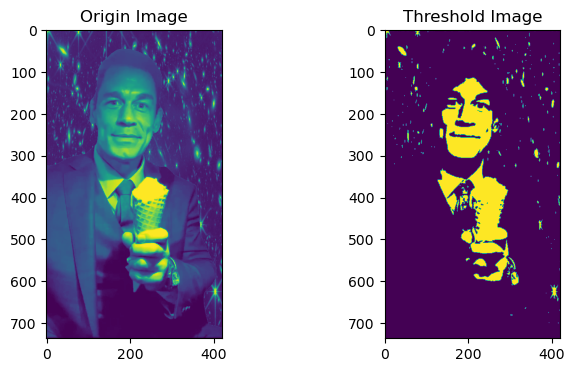

In [50]:
# Gray convert
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Filter threshold according to minimum is 127
ret, th_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Visualize
fg, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, image in enumerate([img_gray, th_img]):
  ax[i].imshow(image)
  if i == 0:
    ax[i].set_title('Origin Image')
  else:
    ax[i].set_title('Threshold Image')

Centers found by scikit-learn:
[[ 24.56271403  21.92031499  23.23501288]
 [167.66753657 183.39680309 220.67034704]
 [ 75.01878891  69.2945897   83.8647425 ]]


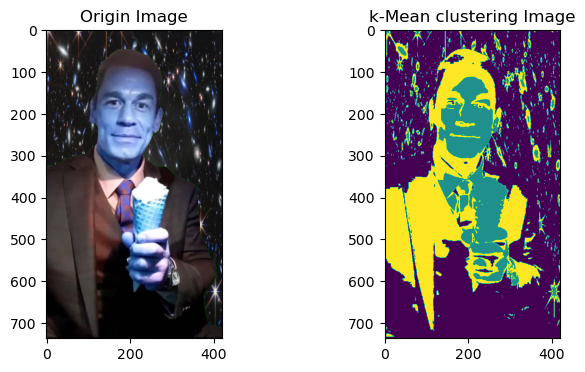

In [8]:
from sklearn.cluster import KMeans
# Reshape X into tensor2D: (width x heigth, n_channels)
X = img.reshape((-1, 3))
# Kmeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)

# Reshape pred_label
X_img = pred_label.reshape(img.shape[:2])

# Display image clustering
fg, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, image in enumerate([img, X_img]):
  ax[i].imshow(image)
  if i == 0:
    ax[i].set_title('Origin Image')
  else:
    ax[i].set_title('k-Mean clustering Image')

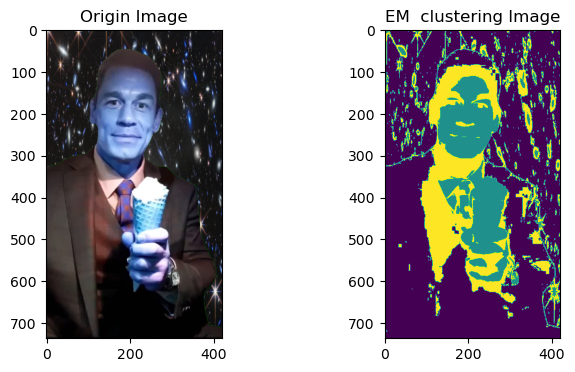

In [6]:
X = img.reshape((-1, 3))
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=3,
              covariance_type='full', max_iter=20, random_state=0).fit(X)

pred_label = em.predict(X)

# Reshape pred_label
X_img = pred_label.reshape(img.shape[:2])

# Display image clustering
fg, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, image in enumerate([img, X_img]):
  ax[i].imshow(image)
  if i == 0:
    ax[i].set_title('Origin Image')
  else:
    ax[i].set_title('EM  clustering Image')